In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip install pm4py
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Reading CSV file

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('/content/drive/My Drive/process mining project for USC students /heart_log_val_0.csv')

In [49]:
df.head()

,type,concept:name,value,time:timestamp,case:concept:name,case:gender,case:age,case:charlson,case:elixhauser,case:dob,case:dod,case:ethnicity,case:label,admission_id,PREDICT
0,lab,Sodium_mean_2,2.0,2166-07-23 17:03:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
1,lab,Sodium_std_0,0.0,2166-07-26 10:30:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
2,admission,unplanned,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
3,admission,Medicare,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
4,lab,Sodium_mean_2,2.0,2166-08-13 03:32:10+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN


In [50]:
event_type = df['type'].unique()
print(event_type)

['lab' 'admission' 'artificial' 'elix_comorb']


In [51]:
event = df['concept:name'].unique()

In [52]:
for i in event:
    print(i)

Sodium_mean_2
Sodium_std_0
unplanned
Medicare
Urea Nitrogen_mean_2
Sodium_std_2
Urea Nitrogen_std_2
event_0
event_2
event_3
event_6
event_9
event_11
event_14
event_15
event_16
event_19
event_20
event_26
event_29
CHF
OND
COAG
FED
Urea Nitrogen_mean_1
Urea Nitrogen_std_1
Private
Sodium_mean_3
Urea Nitrogen_mean_3
CARIT
VALV
PARA
Urea Nitrogen_std_4
Medicaid
PCD
HYPUNC
CPD
HYPOTHY
Sodium_std_1
NTproBNP_mean_9
NTproBNP_std_1
Sodium_std_3
Urea Nitrogen_std_3
Sodium_mean_1
DIABUNC
LD
WLOSS
ALCOHOL
PVD
NTproBNP_std_0
HYPC
RF
DEPRE
planned
Creatinine, Serum_mean_0
Creatinine, Serum_std_0
DRUG
BLANE
SOLIDTUM
NTproBNP_std_6
OBES
DIABC
Urea Nitrogen_mean_0
PUD
METACANC
DANE
Sodium_mean_4
Sodium_std_4
LYMPH
Urea Nitrogen_mean_4
Urea Nitrogen_std_0
PSYCHO
RHEUMD


 Converting csv file to xes file

In [53]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

In [54]:
xes_exporter.apply(df, '/content/drive/My Drive/process mining project for USC students /test.xes')

exporting log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

Inductive miner

In [55]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [56]:
import pm4py
log = xes_importer.apply('/content/drive/My Drive/process mining project for USC students /test.xes')
for thrd in ["0.9"]:
    ptree = inductive_miner.apply(log, parameters={"NOISE_THRESHOLD": float(thrd)})
    net, initial_marking, final_marking = pm4py.convert_to_petri_net(ptree)
    # net, initial_marking, final_marking = inductive_miner.apply(log, parameters={"NOISE_THRESHOLD": float(thrd)})
### Report Petri-net properties ###
print(float(thrd))
print("Process Tree: ", net)
print("PN Places:", len(net.places))
print("PN Transitions:", len(net.transitions))

parsing log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

0.9
Process Tree:  places: [ p_10, p_100, p_101, p_102, p_103, p_105, p_106, p_108, p_109, p_110, p_111, p_112, p_113, p_115, p_116, p_117, p_118, p_119, p_12, p_120, p_13, p_14, p_15, p_17, p_18, p_19, p_20, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_30, p_31, p_32, p_33, p_35, p_36, p_37, p_38, p_40, p_41, p_42, p_43, p_45, p_46, p_47, p_48, p_49, p_5, p_50, p_51, p_52, p_53, p_54, p_55, p_56, p_57, p_58, p_59, p_6, p_60, p_61, p_62, p_64, p_65, p_66, p_67, p_68, p_69, p_7, p_70, p_71, p_72, p_73, p_74, p_75, p_76, p_77, p_78, p_79, p_8, p_80, p_81, p_82, p_83, p_84, p_85, p_86, p_88, p_89, p_9, p_90, p_91, p_92, p_93, p_94, p_95, p_96, p_97, p_98, p_99, sink, source ]
transitions: [ (01dd3f1c-b642-427e-ba48-0cf3cb69f498, 'Urea Nitrogen_std_4'), (02b9d543-964f-460b-90f8-9c3b791a16e0, 'event_9'), (04a07221-279f-48da-83cf-2eb38a3245ad, 'HYPOTHY'), (0a245e08-4aad-4a56-82f8-a8d3eb77f8e1, 'Medicare'), (0fd1429c-78c2-49f7-9209-78adde988e8e, 'CPD'), (126f0db7-e845-40aa-b6e1-2ca8b84777cc, '

Exporting PNML

In [57]:
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
pnml_exporter.apply(net, initial_marking, "/content/drive/My Drive/process mining project for USC students /test.pnml", final_marking=final_marking)

In [58]:
from pm4py.objects.petri_net.importer import importer as pnml_importer
net, im, fm = pnml_importer.apply("/content/drive/My Drive/process mining project for USC students /test.pnml")

In [59]:
print("PN Places:", len(net.places))
print("\nPN Places:", list(net.places))
print("\nPN Transitions:", len(net.transitions))
print("\nPN Transitions:", list(net.transitions))

PN Places: 106

PN Places: [p_103, p_17, p_51, p_33, p_20, p_50, p_54, p_26, p_52, p_30, p_76, p_15, p_55, p_109, p_45, p_56, p_9, p_46, p_59, p_112, p_60, p_81, p_78, p_118, p_37, p_70, p_89, p_99, p_8, p_115, p_95, p_58, p_68, p_93, p_23, p_48, p_10, p_19, p_53, p_42, p_62, p_64, p_96, p_100, p_6, p_77, p_98, p_24, p_66, p_92, p_90, p_88, p_65, p_102, p_75, p_36, p_84, p_22, p_69, p_108, p_32, p_13, p_111, p_105, p_113, sink, p_38, p_40, p_41, p_25, p_61, p_101, p_72, p_47, p_82, p_73, p_14, p_110, p_80, p_31, p_79, p_71, p_12, p_27, p_119, p_117, p_67, p_94, p_74, source, p_18, p_7, p_49, p_106, p_86, p_57, p_28, p_43, p_5, p_83, p_91, p_85, p_97, p_116, p_35, p_120]

PN Transitions: 164

PN Transitions: [(skip_38, None), (skip_56, None), (skip_94, None), (skip_87, None), (9d730e09-74cb-4af8-a9ca-68ce3d4b6ee1, 'NTproBNP_std_0'), (eacb3996-8931-407d-89e5-d6b9dfe3e374, 'Urea Nitrogen_mean_0'), (3cb38819-677c-47d8-a07c-271aba92ade1, 'VALV'), (f67b7d64-0703-4f76-91ce-5677f638f21a, 'LYMP

Petri Net

In [60]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
# from pm4py import write as pnml_writer
# pnml_writer.write_html
import graphviz

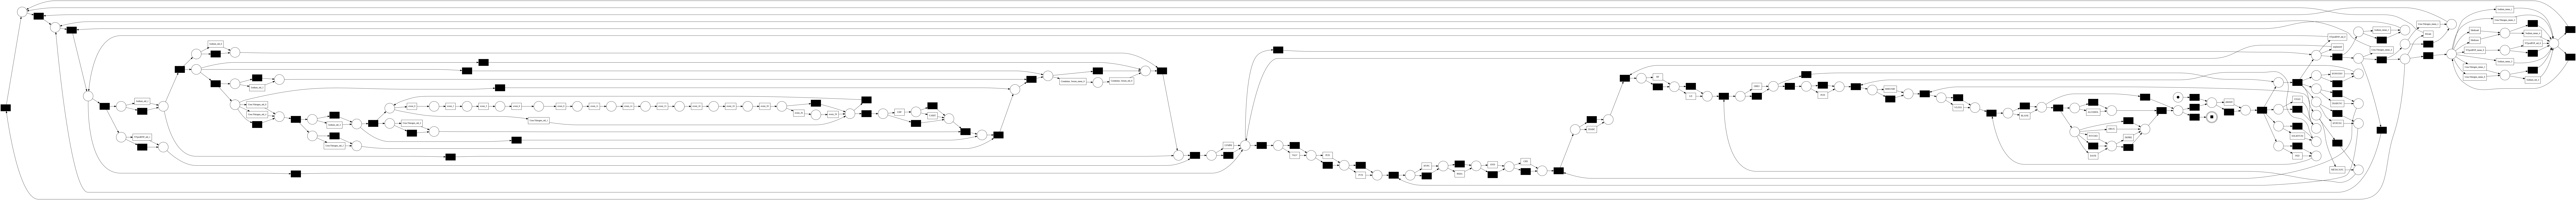

In [61]:
gviz = pn_visualizer.apply(net,im,fm)
pn_visualizer.view(gviz)
# graphviz.Source(gviz)

In [62]:
#conformance checking

Conformance checking

Precision

In [63]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/4545 [00:00<?, ?it/s]

In [64]:
print(prec)

0.05858999540306742


Fitness

In [65]:
# Token based
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_token = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

# Alignment based
#fitness_alignment = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/78 [00:00<?, ?it/s]

In [66]:
print(fitness_token)
#print(fitness_alignment)

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9766754245755334, 'log_fitness': 0.9767594953589542, 'percentage_of_fitting_traces': 0.0}
